# Benchmarking

## Preparation

In [1]:
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
import numpy as np
from matplotlib.lines import Line2D
import json
import gffutils

In [2]:
threshold = 10 # minimal number of genomes per species
threshold_accessory = 0.9 # fraction of genomes per species an orthogroup can be present in at max. to be cosidered accessory
#test_nr_orthogroups = 100
min_contigsize = 20 # minimal contig size to be able to detect MGEs
small_contig_threshold = 100 # contigs containing a number of genes >= 100 are considered small
running_average_default = 20
running_average_default_small_contigs = 5

In [3]:
project_path = Path().resolve().parent
path_Lactobacillales = project_path / "data" / "genomes_metadata.csv"

In [4]:
genome1 = "GCA_000006785.2"
genomes_Lactobacillales = pd.read_csv(path_Lactobacillales).loc[:,'genome':'gtdb_species']
genomes_Lactobacillales

,genome,gtdb_species
0,GCA_000143435.1,Ligilactobacillus salivarius
1,GCA_000167775.1,Streptococcus agalactiae
2,GCA_000167795.1,Streptococcus agalactiae
3,GCA_000179475.1,Ligilactobacillus salivarius
4,GCA_000195355.2,Lactobacillus helveticus
...,...,...
4366,GCA_902165155.1,Enterococcus_B faecium_B
4367,GCA_902165245.1,Enterococcus_B faecium
4368,GCA_902165765.1,Enterococcus_B faecium_B
4369,GCA_902165865.1,Enterococcus_B faecium


## Location --> gene

In [5]:
gff= "/Users/lorevansantvliet/Desktop/Thesis/Project/data/legen_v4_dereplicated_gffs/GCA_000006785.2.gff"

In [11]:
gffutils.create_db(gff, "GCA_000006785.2_db")

OperationalError: table features already exists

In [7]:
db = gffutils.FeatureDB(dbfn=project_path / "results" / "intermediate" / "databases" / "GCA_000006785.2_db")

ValueError: Database file /Users/lorevansantvliet/Desktop/Thesis/Project/results/intermediate/databases/GCA_000006785.2_db does not exist

In [7]:
df=pd.DataFrame(columns = ['contig', 'ID', 'start', 'end', 'strand'])
df

,contig,ID,start,end,strand


In [8]:
query = db.execute("select seqid,start,end,strand,attributes from features where featuretype = 'CDS'")
result = query.fetchall()

for each in result:
    #print(each['end'])
    #df=df.append({'ID':1, 'contig':2, 'end':3, 'start':4}, ignore_index=True)
    df=df.append({'ID':json.loads(each['attributes'])['ID'][0], 'contig':each['seqid'], 'end':each['end'], 'start':each['start'], 'strand':each['strand']}, ignore_index=True)
    #print(each['seqid'])
    #print(each['start'])
    #print(each['end'])
    #print(json.loads(each['attributes'])['ID'][0])

In [9]:
df[(df.start>=5124) & (df.end<=221798)]


,contig,ID,start,end,strand
5,AE004092.2,1_6,5237,8740,+
6,AE004092.2,1_7,8902,9174,+
7,AE004092.2,1_8,9161,9532,+
8,AE004092.2,1_9,9529,9654,+
9,AE004092.2,1_10,9667,10953,+
...,...,...,...,...,...
201,AE004092.2,1_202,216987,217691,+
202,AE004092.2,1_203,217740,219059,+
203,AE004092.2,1_204,219087,220049,+
204,AE004092.2,1_205,220062,220892,+


## Plot

In [10]:
full=pd.read_csv(project_path / "data" / "filtered_pangenome.csv")

In [11]:
order = full["gene"].str.split("_", n = 1, expand = True)
order[1] = pd.to_numeric(order[1])
order.columns = ["contig", "order"]
order

,contig,order
0,AZBY01000002.1,55
1,AZBY01000006.1,5
2,AZBY01000017.1,5
3,AZBY01000022.1,5
4,AZBY01000005.1,59
...,...,...
7173240,FUWE01000032.1,2
7173241,FUWE01000032.1,3
7173242,FUWE01000032.1,4
7173243,FUWE01000032.1,5


In [12]:
full_order = order.merge(full, left_index= True, right_index= True)
full_order

,contig,order,Unnamed: 0,genome,gtdb_species,counts,gene,orthogroup
0,AZBY01000002.1,55,0,GCA_000687335.1,Apilactobacillus kunkeei_A,10,AZBY01000002.1_55,F00268_1
1,AZBY01000006.1,5,1,GCA_000687335.1,Apilactobacillus kunkeei_A,10,AZBY01000006.1_5,F00239_44
2,AZBY01000017.1,5,2,GCA_000687335.1,Apilactobacillus kunkeei_A,10,AZBY01000017.1_5,F00239_42
3,AZBY01000022.1,5,3,GCA_000687335.1,Apilactobacillus kunkeei_A,10,AZBY01000022.1_5,F00239_42
4,AZBY01000005.1,59,4,GCA_000687335.1,Apilactobacillus kunkeei_A,10,AZBY01000005.1_59,F00476_30
...,...,...,...,...,...,...,...,...
7173240,FUWE01000032.1,2,7173240,GCA_900166935.1,Weissella confusa,21,FUWE01000032.1_2,F20199_1
7173241,FUWE01000032.1,3,7173241,GCA_900166935.1,Weissella confusa,21,FUWE01000032.1_3,F09484_2
7173242,FUWE01000032.1,4,7173242,GCA_900166935.1,Weissella confusa,21,FUWE01000032.1_4,F24229_1
7173243,FUWE01000032.1,5,7173243,GCA_900166935.1,Weissella confusa,21,FUWE01000032.1_5,F21546_1


In [13]:
# check if there exists a genome with only 1 contig
nr_contigs = full_order.loc[:,['contig', 'genome']].drop_duplicates().groupby(by = "genome", as_index = False).count()
nr_contigs.columns = ["genome", "contig_count"]

In [14]:
#
# size (number of genes) of contigs
nr_genes = full_order.loc[:,['contig', 'gene']].drop_duplicates().groupby(by = "contig", as_index = False).count()
nr_genes.columns = ["contig", "nr_genes"]
nr_genes.sort_values(by='nr_genes')

,contig,nr_genes
233234,VKOD01000160.1,1
140422,MIML01000045.1,1
49623,AZFL01000123.1,1
140420,MIML01000042.1,1
140418,MIML01000040.1,1
...,...,...
218712,RYZS01000001.1,3562
72599,CM002129.1,3843
155863,MVDZ01000001.1,4290
155853,MVDY01000001.1,4388


In [15]:
def get_size(contig):
    return nr_genes.nr_genes[nr_genes.contig==contig].item()

In [16]:
counts = genomes_Lactobacillales.groupby(by = "gtdb_species", as_index = False).count()
counts.columns = ['gtdb_species', 'counts']
counts

,gtdb_species,counts
0,26KH-42 sp004358325,1
1,Abiotrophia defectiva,1
2,Abiotrophia sp001815865,1
3,Abiotrophia sp900604935,1
4,Aerococcus christensenii,3
...,...,...
811,Weissella paramesenteroides,3
812,Weissella soli,1
813,Weissella thailandensis,2
814,Weissella viridescens,2


In [17]:
#
### get accessory in a species
def get_accessory(species):
    full_species = full[full.gtdb_species==species]
    orthocounts_genomes_per_species = full_species.loc[:,["orthogroup","gtdb_species","genome"]].drop_duplicates().groupby(by = ["gtdb_species", "orthogroup"], as_index = False).count()
    orthocounts_genomes_per_species.columns = ["gtdb_species", "orthogroup", "orthocounts"]
    res = pd.merge(orthocounts_genomes_per_species, counts, on = 'gtdb_species', how = 'left')
    res.columns = ["gtdb_species", "orthogroup", "orthocounts", "genome_counts"]
    res['accessory'] = (res.orthocounts <= threshold_accessory * res.genome_counts)
    d = {True: 'red', False: 'blue'}
    res.accessory = res.accessory.map(d)
    return res


In [18]:
def get_contigs(genome):
    contigs = pd.DataFrame()
    contigs['contig']=full_order.contig[full_order.genome==genome].drop_duplicates()
    contigs_size=contigs.merge(nr_genes, on='contig')
    contigs_final=contigs_size[(contigs_size.nr_genes)>=min_contigsize]
    #contigs['size']=contigs.contig.get_size()
    #contigs=contigs[contigs.get_size()>=min_contigsize]
    return contigs_final.contig

In [19]:
#
def get_species(genomes, genome):
    return genomes[genomes.genome==genome].gtdb_species.item()

In [26]:
### results PhageHunter (correct)
x=list(range(357,380))
x.extend(list(range(505,554)))
x.extend(list(range(1145,1215)))
x.extend(list(range(1698,1718)))
x


[357,
 358,
 359,
 360,
 361,
 362,
 363,
 364,
 365,
 366,
 367,
 368,
 369,
 370,
 371,
 372,
 373,
 374,
 375,
 376,
 377,
 378,
 379,
 505,
 506,
 507,
 508,
 509,
 510,
 511,
 512,
 513,
 514,
 515,
 516,
 517,
 518,
 519,
 520,
 521,
 522,
 523,
 524,
 525,
 526,
 527,
 528,
 529,
 530,
 531,
 532,
 533,
 534,
 535,
 536,
 537,
 538,
 539,
 540,
 541,
 542,
 543,
 544,
 545,
 546,
 547,
 548,
 549,
 550,
 551,
 552,
 553,
 1145,
 1146,
 1147,
 1148,
 1149,
 1150,
 1151,
 1152,
 1153,
 1154,
 1155,
 1156,
 1157,
 1158,
 1159,
 1160,
 1161,
 1162,
 1163,
 1164,
 1165,
 1166,
 1167,
 1168,
 1169,
 1170,
 1171,
 1172,
 1173,
 1174,
 1175,
 1176,
 1177,
 1178,
 1179,
 1180,
 1181,
 1182,
 1183,
 1184,
 1185,
 1186,
 1187,
 1188,
 1189,
 1190,
 1191,
 1192,
 1193,
 1194,
 1195,
 1196,
 1197,
 1198,
 1199,
 1200,
 1201,
 1202,
 1203,
 1204,
 1205,
 1206,
 1207,
 1208,
 1209,
 1210,
 1211,
 1212,
 1213,
 1214,
 1698,
 1699,
 1700,
 1701,
 1702,
 1703,
 1704,
 1705,
 1706,
 1707,
 1708,
 

In [27]:
### results Phaster
x2=list(range(155,165))
x2.extend(list(range(502,554)))
x2.extend(list(range(738,804)))
x2.extend(list(range(1147,1207)))
x2

[155,
 156,
 157,
 158,
 159,
 160,
 161,
 162,
 163,
 164,
 502,
 503,
 504,
 505,
 506,
 507,
 508,
 509,
 510,
 511,
 512,
 513,
 514,
 515,
 516,
 517,
 518,
 519,
 520,
 521,
 522,
 523,
 524,
 525,
 526,
 527,
 528,
 529,
 530,
 531,
 532,
 533,
 534,
 535,
 536,
 537,
 538,
 539,
 540,
 541,
 542,
 543,
 544,
 545,
 546,
 547,
 548,
 549,
 550,
 551,
 552,
 553,
 738,
 739,
 740,
 741,
 742,
 743,
 744,
 745,
 746,
 747,
 748,
 749,
 750,
 751,
 752,
 753,
 754,
 755,
 756,
 757,
 758,
 759,
 760,
 761,
 762,
 763,
 764,
 765,
 766,
 767,
 768,
 769,
 770,
 771,
 772,
 773,
 774,
 775,
 776,
 777,
 778,
 779,
 780,
 781,
 782,
 783,
 784,
 785,
 786,
 787,
 788,
 789,
 790,
 791,
 792,
 793,
 794,
 795,
 796,
 797,
 798,
 799,
 800,
 801,
 802,
 803,
 1147,
 1148,
 1149,
 1150,
 1151,
 1152,
 1153,
 1154,
 1155,
 1156,
 1157,
 1158,
 1159,
 1160,
 1161,
 1162,
 1163,
 1164,
 1165,
 1166,
 1167,
 1168,
 1169,
 1170,
 1171,
 1172,
 1173,
 1174,
 1175,
 1176,
 1177,
 1178,
 1179,
 

In [20]:
#results ICEfinder
x3=list(range(6, 207))

In [21]:
path_mobility = project_path / "data" / "mobility_frame.csv"
mobility_frame=mobility_frame = pd.read_csv(path_mobility)

In [24]:
def mobility_plot_contig(genome, contig, order, method="mobility_score", n=20):
    """Plots the mobility score across a genome of choice, according to a method of choice.
    
    Args:
        genome: String representing the ID of the genome for which the mobility score needs to be plotted.
        order: Datafame containing information on the contig, and order of genes, and pangenome information.
        method: String representing the method used for calculating the mobility score. Options: "species_count", "genomes_count", "accessory_count".
        n: integer indicating the number of consecutive genes to take into account for a moving average calulation.
    """
    
    accessory_species=get_accessory(get_species(genomes_Lactobacillales, genome))
    genome_order = order[(order.genome == genome)&(order.contig ==contig)].loc[:,["order", "orthogroup"]]
    mob_order = pd.merge(genome_order, mobility_frame, on="orthogroup", how="left").sort_values(by="order")
    mob_order_acc = pd.merge(mob_order, accessory_species, on="orthogroup", how = "left")
    
    fig, ax = plt.subplots(figsize=(30, 10))
    ax.plot(mob_order_acc.order, mob_order_acc[method].rolling(window=n,center=True).mean())
    #ax.scatter(mob_order_acc.order, mob_order_acc[method].rolling(window=n, center=True).mean(), c=mob_order_acc.accessory, marker='o', label=mob_order_acc.accessory)
    # ['accessory or multi copy', 'single copy core']
    y=mob_order_acc[method].rolling(window=n,center=True).mean()
    # Prophage Hunter
    #y1=y.iloc[x]
    #ax.scatter(x, y1, c='red', marker='o', label = "Prophage Hunter phage prediction")
    # Phaster
    #y2=y.iloc[x2]
    #ax.scatter(x2, y2, c='red', marker='o', label = "Phaster phage prediction")
    # ICEfinder
    y3=y.iloc[x3]
    ax.scatter(x3, y3, c='red', marker='o', label = "ICEfinder ICE prediction")
    ax.legend(fontsize=20)
    ax.set_xlabel("Gene position", fontsize=20)
    ax.set_ylabel("Mobility score", fontsize=20)
    ax.set_title(genome, fontsize=30)
    ax.tick_params(labelsize=18)
    plt.show()
    
def mobility_plots(genome, order, method="accessory_count", n=running_average_default):
    for contig in get_contigs(genome):
        if get_size(contig) <= small_contig_threshold:
            n=running_average_default_small_contigs
        mobility_plot_contig(genome, contig, full_order, n=n, method=method)

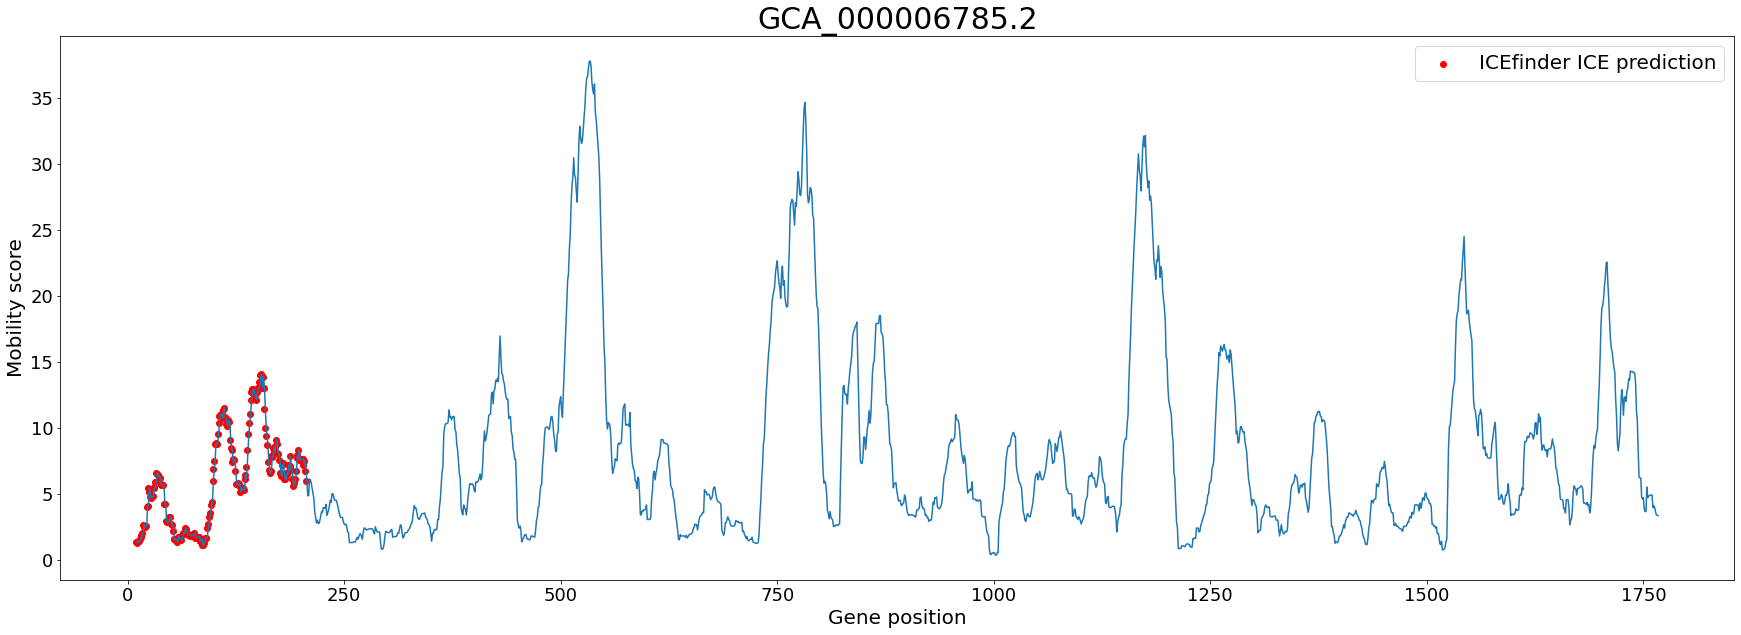

In [25]:
mobility_plots(genome1, full_order)

In [ ]:
!